<a href="https://colab.research.google.com/github/imeamin/Digital-Transformation-Educaiton/blob/master/2021_02_15_Mnist_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
Y_train[0]

5

In [ ]:
cnt=0
for i in range(10):
  for num in Y_train:
    if i==num:
      cnt+=1
  print("%d 값의 갯수는 %d개"%(i+1,cnt))

1 값의 갯수는 5923개
2 값의 갯수는 12665개
3 값의 갯수는 18623개
4 값의 갯수는 24754개
5 값의 갯수는 30596개
6 값의 갯수는 36017개
7 값의 갯수는 41935개
8 값의 갯수는 48200개
9 값의 갯수는 54051개
10 값의 갯수는 60000개


In [ ]:
#원핫 인코딩 결과
for i in range(3):
  print(Y_train[i])

5
0
4


In [ ]:
#딥러닝 기본 프레임 만들기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# 모델 프레임 설정
#입력값:784개, 은닉층: 512개, 출력:10개
model = Sequential([  Dense(512, input_dim=784, activation='relu'),     
     Dense(10, activation='softmax')])

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10208, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10208 to 0.08898, saving model to ./model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08898 to 0.07866, saving model to ./model/04-0.0787.hdf5

Epoch 00005: val_loss improved from 0.07866 to 0.07373, saving model to ./model/05-0.0737.hdf5

Epoch 00006: val_loss improved from 0.07373 to 0.06731, saving model to ./model/06-0.0673.hdf5

Epoch 00007: val_loss improved from 0.06731 to 0.06465, saving model to ./model/07-0.0646.hdf5

Epoch 00008: val_loss improved from 0.06465 to 0.06357, saving model to ./model/08-0.0636.hdf5

Epoch 00009: val_loss improved from 0.06357 to 0.06278, saving model to ./model/09-0.0628.hdf5

Epoch 00010: val_loss improved from 0.06278 to 0.06218, saving model to ./model/10-0.0622.hdf5

Epoch 00011: val_loss did not improve from 

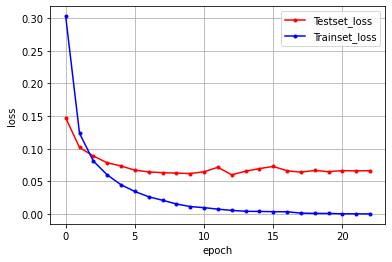

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
#학습모델 저장
from tensorflow.python.keras.models import load_model
model.save('myModelMnist.h5')

In [ ]:
cd /content/drive/MyDrive/빅데이터 교육/deeplearning/손글씨

/content/drive/MyDrive/빅데이터 교육/deeplearning/손글씨


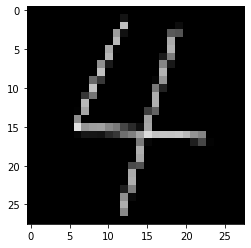

In [ ]:
#저장한 학습모델을 불러와서 
from PIL import Image
import matplotlib.pyplot as plt

my=plt.imread('four.png')
plt.imshow(my)

In [ ]:
my.shape #가로, 세로의 길이 28*28

(28, 28, 3)

In [ ]:
#위의 사진 자료를 28*28해서 784의 이미지로 변경
tmp=my[:,:,1]
tmp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07843138, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7529412 , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
test_num=(tmp.reshape((1,28*28)))

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model=keras.models.load_model('myModelMnist.h5')
print(model.predict(test_num))

[[2.6888054e-06 7.1932460e-05 3.5098398e-03 1.7344496e-03 2.7179953e-01
  6.7502421e-01 1.5463904e-02 3.2160610e-02 1.8875832e-04 4.4135952e-05]]


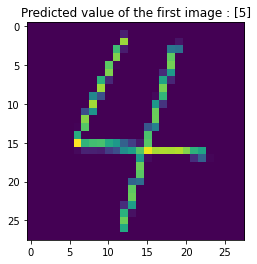

In [ ]:
#resize로 (28,28)
result = model.predict(test_num)
#import matplotlib.pyplot as plt
#import numpy as np

arg_result = np.argmax(result, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(test_num.reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_result))
plt.show()
